### Flavia Carravieri
# <span style="color:deeppink"> NSL - ESERCITAZIONE 11 </span>


### Esercizio 11.3

Si è esteso il modello per fittare una funzione trigonometrica a due variabili $f(x,y) = \sin(x^2+y^2)$ nel range range $x \in [-3/2,3/2]$ e  $y \in [-3/2,3/2]$.

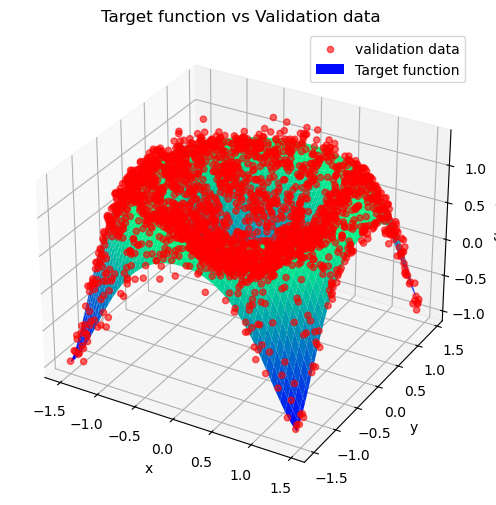

In [39]:
import numpy as np
import math 
import matplotlib.pyplot as plt

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-3/2, 3/2, 1000)
y_train = np.random.uniform(-3/2, 3/2, 1000)
x_valid = np.random.uniform(-3/2, 3/2, 50)
y_valid = np.random.uniform(-3/2, 3/2, 50)

x_valid.sort() #ordino per unire meglio i punti nel grafico
y_valid.sort()

X_valid, Y_valid=np.meshgrid (x_valid, y_valid)
z_target = np.sin(X_valid**2+Y_valid**2)  # ideal (target) 

X_input_valid=np.stack((x_valid, y_valid), axis=1) #mi serve avere input 1D per la funzione history 

x_train.sort() #ordino per unire meglio i punti nel grafico
y_train.sort() 
X_train, Y_train=np.meshgrid (x_train, y_train)

X_input_train=np.stack((x_train, y_train), axis=1) #mi serve avere input 1D per la funzione history 

sigma = 0.1 # noise standard deviation
z_train = np.random.normal(np.sin(X_train**2+Y_train**2), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(X_valid**2+Y_valid**2), sigma)

# Plot 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(x, y, z_target,color="blue", label='target', alpha=0.6)
ax.scatter(X_valid, Y_valid, z_valid, color='red', alpha=0.6, label='validation data')

# 1. Crea griglia regolare
x_grid = np.linspace(min(x_valid), max(x_valid), 100)
y_grid = np.linspace(min(y_valid), max(y_valid), 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = np.sin(X**2 + Y**2)
surf = ax.plot_surface(X, Y, Z, cmap='winter',label="Target function")
ax.legend(['Target surface'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Target function vs Validation data')
ax.legend()
plt.show()

In [41]:
# compose the NN model
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras

#import tensorflow.keras as keras
print(keras.__version__)

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K
from keras.utils import get_custom_objects

model = keras.Sequential()
model.add(Dense(40, input_shape=(2,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Activation
#from tensorflow.keras import backend as K
#from tensorflow.keras.utils import get_custom_objects

#model = tf.keras.Sequential()
#model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
#model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2.18.1
3.6.0


In [43]:
# get a summary of our composed model
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 40)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=X_input_train, y=z_train,
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(X_input_valid, z_valid))

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4806 - mse: 0.4806 - val_loss: 0.2027 - val_mse: 0.2027
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2018 - mse: 0.2018 - val_loss: 0.1559 - val_mse: 0.1559
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1762 - mse: 0.1762 - val_loss: 0.1451 - val_mse: 0.1451
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1675 - mse: 0.1675 - val_loss: 0.1428 - val_mse: 0.1428
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1670 - mse: 0.1670 - val_loss: 0.1413 - val_mse: 0.1413
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1612 - mse: 0.1612 - val_loss: 0.1361 - val_mse: 0.1361
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1611 - mse: 0.1611 - val_loss: 0.1335 - val_mse: 0.1335
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1546 - mse: 0.1546 - val_loss: 0.1306 - val_mse: 0.1306
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1462 - mse: 

In [47]:
# return weights and biases
pesi=model.get_weights()

In [49]:
# evaluate model
score = model.evaluate(X_input_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1290 - mse: 0.1290

Test loss: 0.12965688109397888
Test accuracy: 0.12965688109397888


In [51]:
# evaluate model with the exact curve
score = model.evaluate(X_input_valid, z_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1188 - mse: 0.1188

Test loss: 0.11916272342205048
Test accuracy: 0.11916272342205048


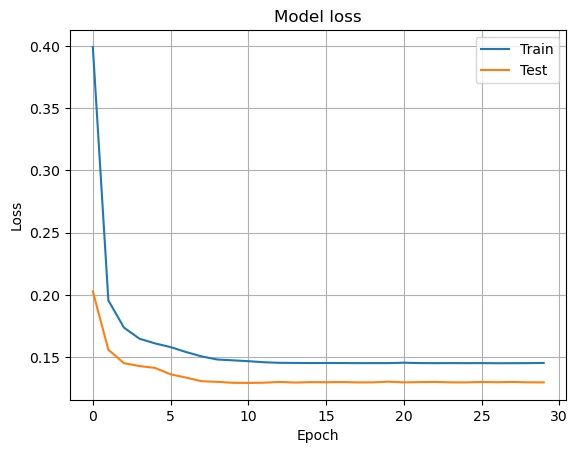

In [53]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


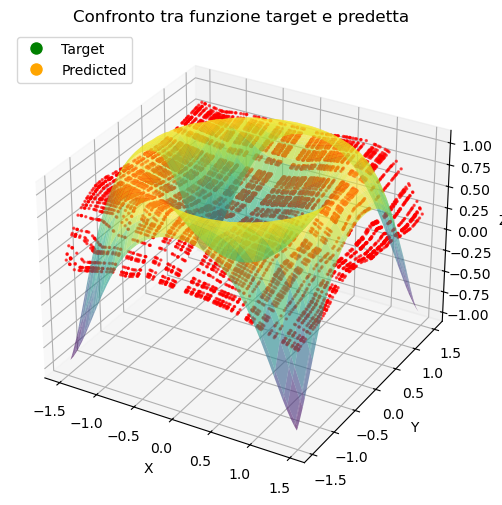

In [55]:
from mpl_toolkits.mplot3d import Axes3D
# generate training inputs
np.random.seed(0)
x = np.random.uniform(-3/2, 3/2, 100)
y = np.random.uniform(-3/2, 3/2, 100)
x.sort()
y.sort()
X, Y = np.meshgrid(x, y)

# Calcola le due superfici
Z_target = np.sin(X**2 + Y**2)   # Funzione vera
# Supponiamo tu abbia z_pred già calcolato come array 1D
z_pred = model.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)

# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Prima superficie (target)
ax.plot_surface(X, Y, Z_target, cmap='viridis', alpha=0.6, label='Target')
# Seconda superficie (predetta)
ax.scatter(X, Y, z_pred, color='red', alpha=0.6, s= 2, label='Predicted')
# Titolo e assi
ax.set_title("Confronto tra funzione target e predetta")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Nota: `plot_surface` non supporta direttamente `label`, quindi per la legenda usa un workaround:
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Target', markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Predicted', markerfacecolor='orange', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper left')

plt.show()
